In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD
from keras.initializers import glorot_uniform
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import sklearn
from matplotlib.colors import LogNorm
import data
import model

Using TensorFlow backend.


In [2]:
batch_size = 32
training_size = 2913
testing_size = 210

train_gen = data.data_gen('dataset/images_train', 'dataset/annotations_train', batch_size=batch_size, one_hot=True)
test_gen = data.data_gen('dataset/images_test', 'dataset/annotations_test', batch_size=batch_size, one_hot=True)
x, y = next(test_gen)

### Model 2020_06_09-08_00_47 (No weights)

SGD, lr=0.0001, momentum=.9, keras CCE loss, batch_size=32, epochs=582, steps=5
- train accuracy: 76.92%
- loss: .9883

In [3]:
m = keras.models.load_model('experiments/model.2020_06_09-08_00_47.h5')

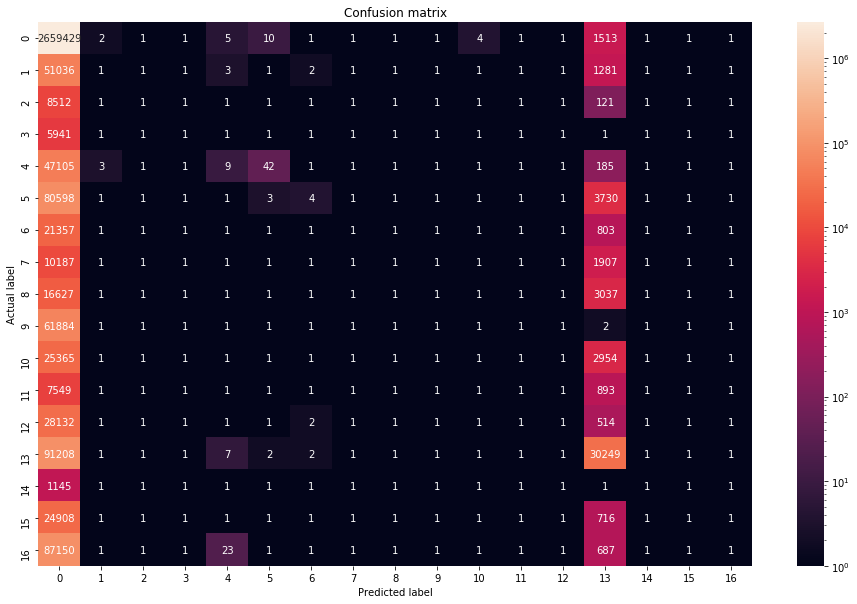

In [22]:
y_true, y_pred = model.predict_dataset(m, test_gen, 50, batch_size)
data.confusion_matrix(y_true, y_pred)
#plt.savefig('weights_cmA.png', bbox_inches='tight')

In [17]:
y_hat = m.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


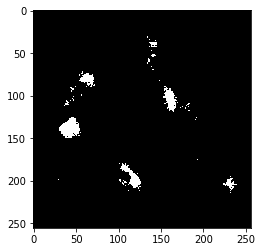

In [24]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[3], axis=2))
plt.imshow(mask)
#plt.savefig('weights_cowA.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


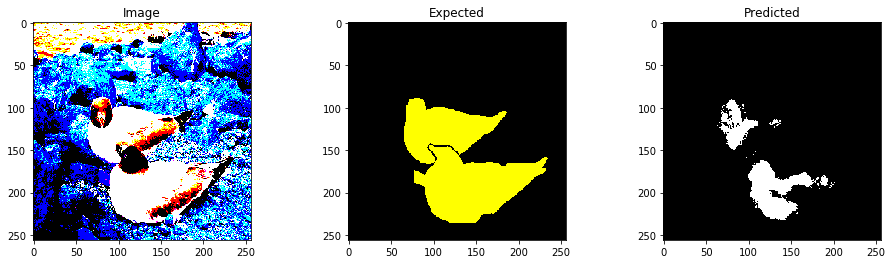

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


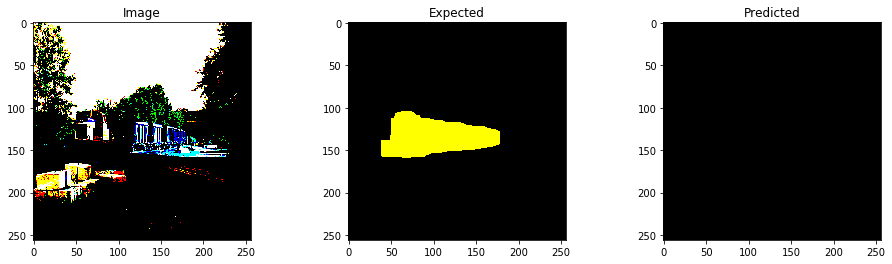

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


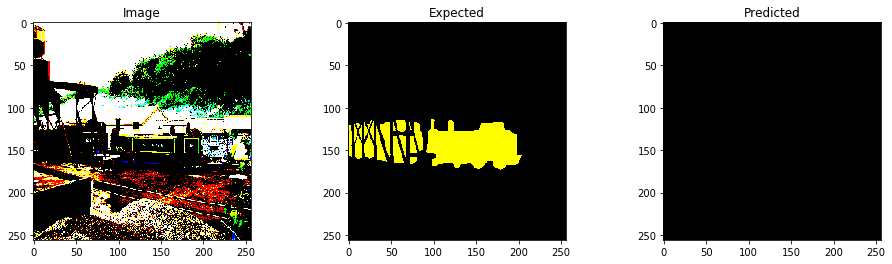

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


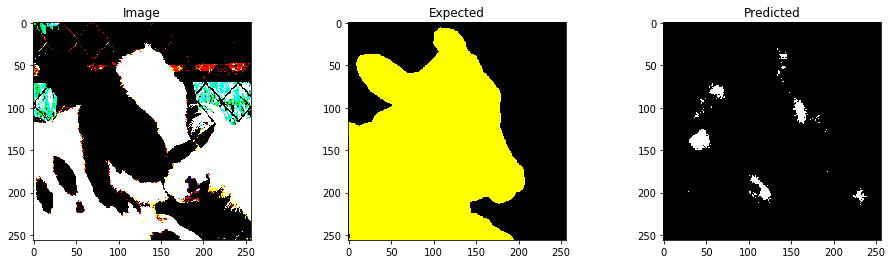

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


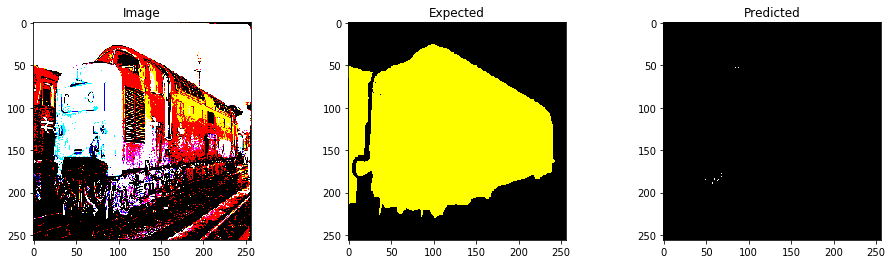

In [18]:
for i in range(5):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()

### Model 2020_06_09-09_55_28 (Weight BG=0.1)

SGD, lr=0.0001, momentum=.9, custom CCE weighted (bg=.1) loss, batch_size=32, epochs=582, steps=5
- train accuracy: 68.96% (Mais l'accuracy n'est pas weighted !)
- loss: .5846
- precision: .8410

In [3]:
m = keras.models.load_model('experiments/model.2020_06_09-09_55_28.h5', custom_objects={'loss': model.weighted_categorical_crossentropy([.1 if i==0 else 1 for i in range(21)])})

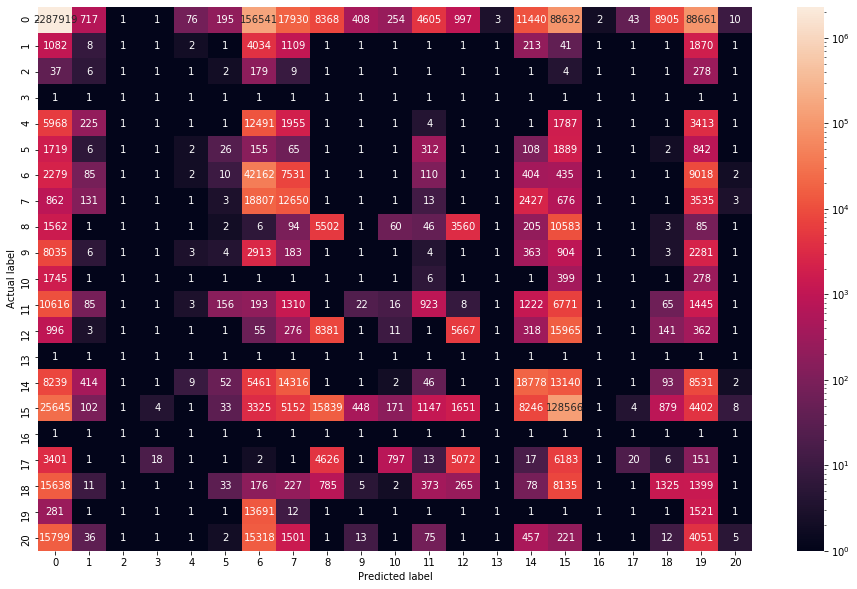

In [4]:
y_true, y_pred = model.predict_dataset(m, test_gen, 50, batch_size)
data.confusion_matrix(y_true, y_pred)
#plt.savefig('weights_cmB.png', bbox_inches='tight')

In [5]:
y_hat = m.predict(x)

In [16]:
true_positives = np.sum(np.round(np.clip(y * y_hat, 0, 1)))
predicted_positives = np.sum(np.round(np.clip(y_hat, 0, 1)))
precision = true_positives / (predicted_positives + 1e-7)
print('Precision:', precision)

Precision: 0.8410481419920751


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


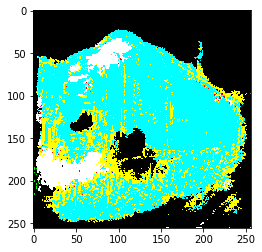

In [7]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[4], axis=2))
plt.imshow(mask)
#plt.savefig('weights_trainB.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car:          2.57%
cat:          9.47%
chair:        0.02%
cow:          0.97%
dinningtable: 4.41%
dog:          2.47%
horse:        0.00%
motorbike:    1.45%
person:       74.78%
sheep:        0.02%
sofa:         3.75%
train:        0.08%


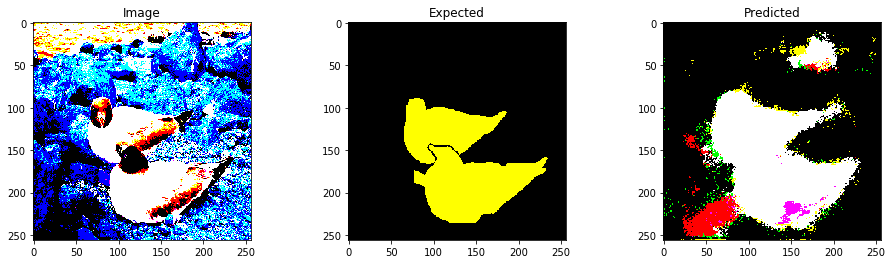

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bus:          53.80%
car:          0.02%
train:        46.17%


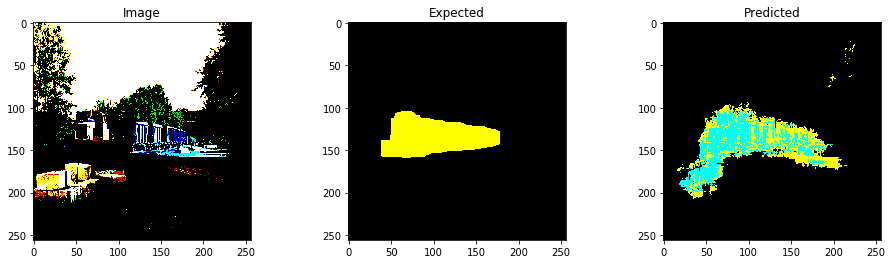

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.03%
boat:         0.05%
bus:          73.82%
car:          0.13%
dinningtable: 0.04%
train:        25.93%
tvmonitor:    0.01%


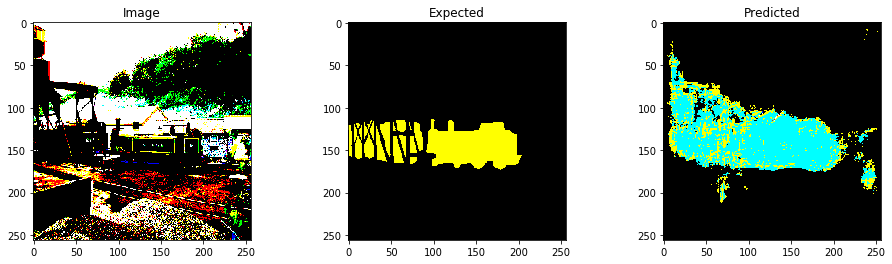

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.01%
bird:         0.01%
bottle:       0.00%
bus:          0.01%
car:          0.03%
cat:          43.61%
cow:          0.49%
dinningtable: 0.08%
dog:          9.10%
horse:        0.01%
motorbike:    0.13%
person:       46.37%
sheep:        0.00%
sofa:         0.05%
train:        0.10%


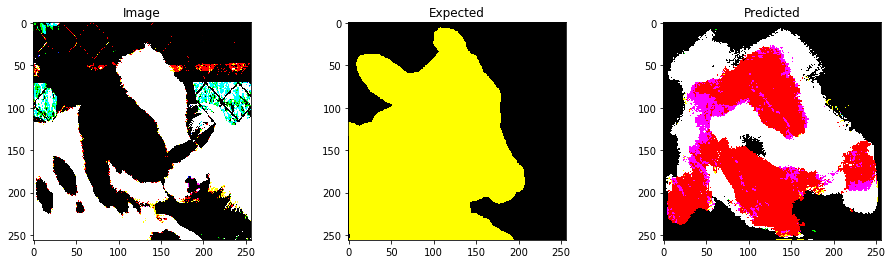

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.22%
boat:         0.00%
bottle:       0.02%
bus:          68.14%
car:          4.85%
dinningtable: 0.01%
motorbike:    2.93%
person:       2.37%
sofa:         0.06%
train:        21.38%
tvmonitor:    0.01%


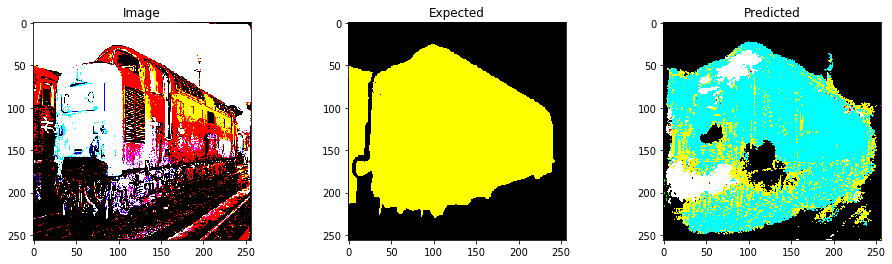

In [5]:
for i in range(5):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()

### Model 2020_06_09-11_39_31 (Weights BG=0.01)

SGD, lr=0.0001, momentum=.9, custom CCE weighted (bg=.01) loss, batch_size=32, epochs=582, steps=5
- train accuracy: 39.6% (Mais l'accuracy n'est pas weighted !)
- loss: .5071
- precision: .7752

In [8]:
m = keras.models.load_model('experiments/model.2020_06_09-11_39_31.h5', custom_objects={'loss': model.weighted_categorical_crossentropy([.1 if i==0 else 1 for i in range(21)])})

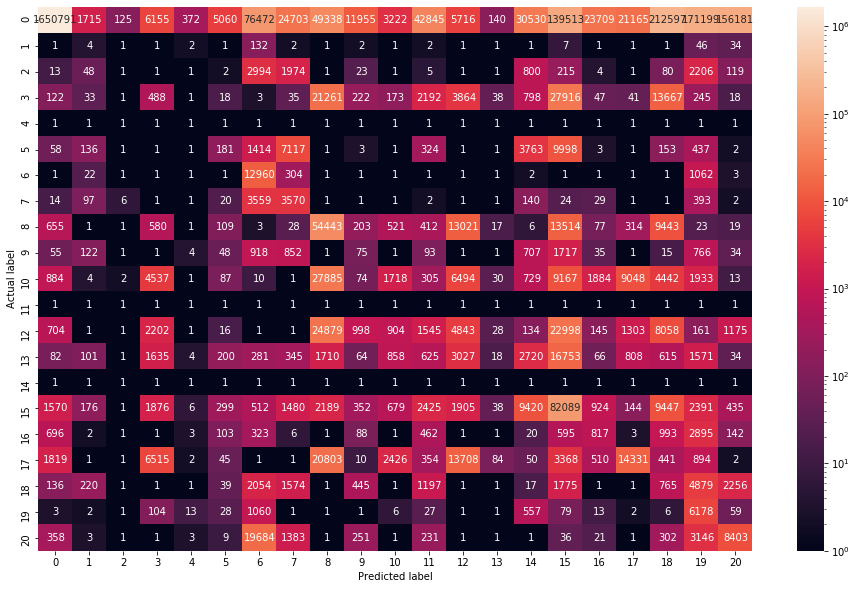

In [9]:
y_true, y_pred = model.predict_dataset(m, test_gen, 50, batch_size)
data.confusion_matrix(y_true, y_pred)
#plt.savefig('weights_cmC.png', bbox_inches='tight')

In [11]:
y_hat = m.predict(x)

In [19]:
true_positives = np.sum(np.round(np.clip(y * y_hat, 0, 1)))
predicted_positives = np.sum(np.round(np.clip(y_hat, 0, 1)))
precision = true_positives / (predicted_positives + 1e-7)
print('Precision:', precision)

Precision: 0.7752311426504434


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


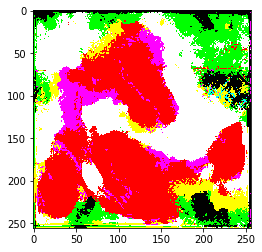

In [13]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[3], axis=2))
plt.imshow(mask)
#plt.savefig('weights_cowC.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.02%
bird:         1.20%
bottle:       0.35%
bus:          0.00%
car:          0.69%
cat:          8.44%
chair:        0.77%
cow:          2.27%
dinningtable: 21.76%
dog:          2.81%
horse:        0.02%
motorbike:    1.68%
person:       29.86%
pottedplant:  0.08%
sheep:        2.38%
sofa:         26.67%
train:        0.99%
tvmonitor:    0.01%


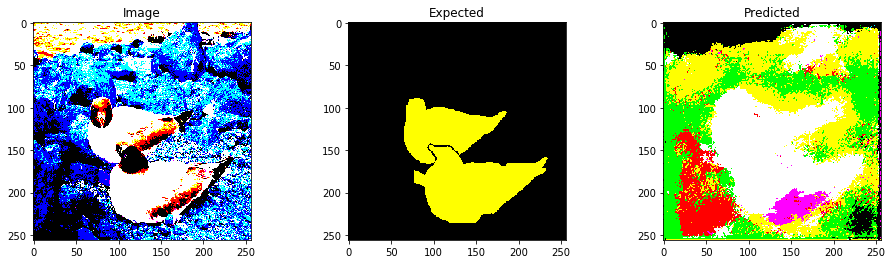

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.01%
boat:         0.02%
bottle:       0.13%
bus:          16.42%
chair:        0.39%
dinningtable: 0.36%
motorbike:    0.22%
person:       0.11%
pottedplant:  3.52%
sheep:        0.01%
sofa:         4.58%
train:        53.32%
tvmonitor:    20.89%


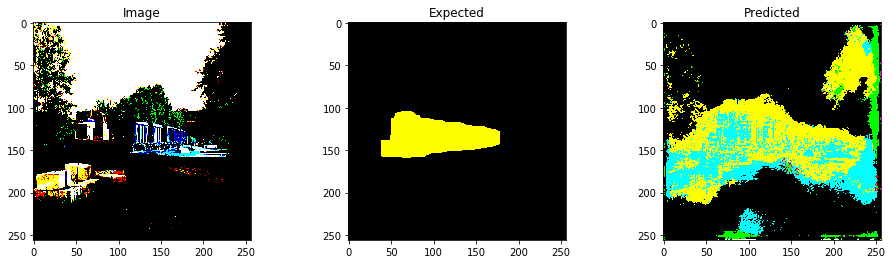

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.09%
bicycle:      0.00%
bird:         0.00%
boat:         0.04%
bottle:       0.29%
bus:          37.01%
car:          0.10%
chair:        0.25%
dinningtable: 0.76%
motorbike:    0.40%
person:       0.41%
pottedplant:  0.76%
sheep:        0.75%
sofa:         2.31%
train:        36.81%
tvmonitor:    20.02%


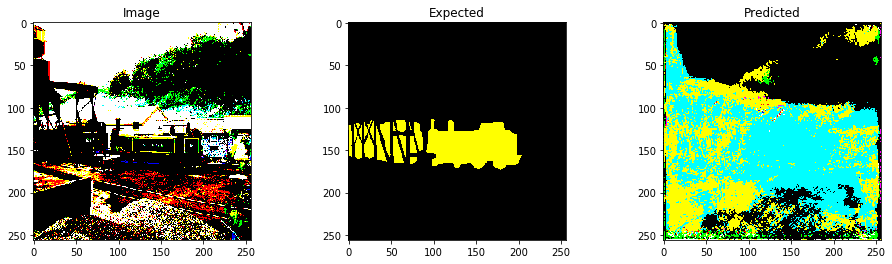

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.00%
bird:         2.36%
boat:         0.00%
bottle:       0.22%
bus:          0.03%
cat:          37.10%
chair:        0.30%
cow:          1.00%
dinningtable: 1.22%
dog:          7.68%
horse:        0.08%
motorbike:    0.13%
person:       32.15%
pottedplant:  5.11%
sheep:        2.63%
sofa:         8.72%
train:        0.97%
tvmonitor:    0.27%


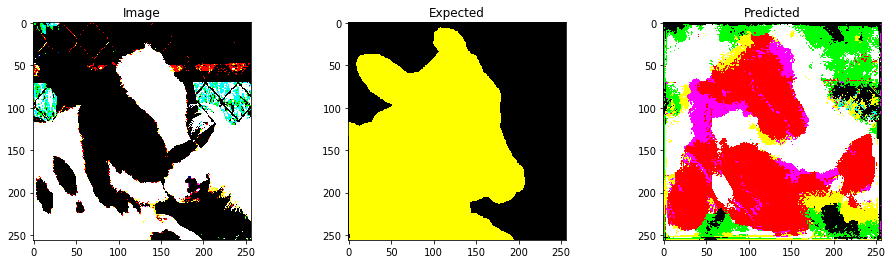

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


aeroplane:    0.36%
boat:         0.02%
bottle:       0.09%
bus:          53.13%
car:          6.36%
chair:        0.22%
dinningtable: 0.37%
motorbike:    4.53%
person:       5.00%
pottedplant:  0.08%
sofa:         1.55%
train:        19.15%
tvmonitor:    9.13%


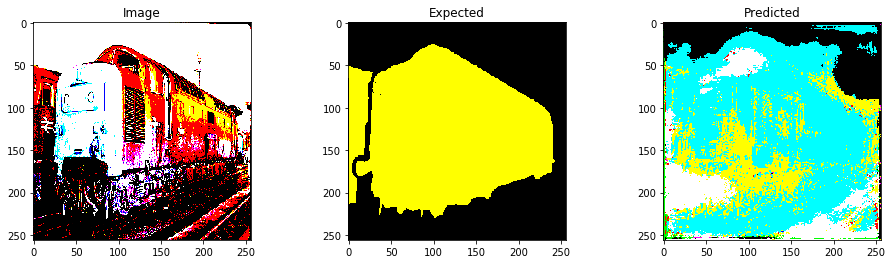

In [6]:
for i in range(5):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()

### Model 2020_06_09-15_40_10 (Weights proportionnal to each class quantity)

weights = [0.01371744, 1.26686665, 2.25925349, 0.83690247, 1.47709128, 1.52770137, 0.54357895, 0.60541079, 0.55497391, 2.15639912, 0.87952661, 0.55227816, 0.68803975, 1.40513642, 0.7132309 , 0.19231379, 1.99429622, 0.81044813, 0.91321477, 0.46927649, 1.1004744 ]

SGD, lr=0.0001, momentum=.9, custom CCE weighted (weights relative to quantity) loss, batch_size=32, epochs=582, steps=5
- train accuracy: 32.47% (Mais l'accuracy n'est pas weighted !)
- loss: .4166
- precision: .8410


In [3]:
"""
y = np.zeros(1)
for i in range(20):
  _, x = next(test_gen)
  y = np.concatenate((y, np.argmax(x, axis=3).reshape(-1)))
_, weights = np.unique(y, return_counts=True)
weights = y.size / weights
"""
w = [0.01371744, 1.26686665, 2.25925349, 0.83690247, 1.47709128, 1.52770137, 0.54357895, 0.60541079, 0.55497391, 2.15639912, 0.87952661, 0.55227816, 0.68803975, 1.40513642, 0.7132309 , 0.19231379, 1.99429622, 0.81044813, 0.91321477, 0.46927649, 1.1004744 ]
m5 = model.get_model()
m5.compile(optimizer=SGD(learning_rate=0.0001, momentum=.9),
          loss=model.weighted_categorical_crossentropy(weights=w),
          metrics=['accuracy', keras.metrics.Precision()])
m5.load_weights('experiments/model.2020_06_09-15_40_10.h5')

/home/rhidra/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


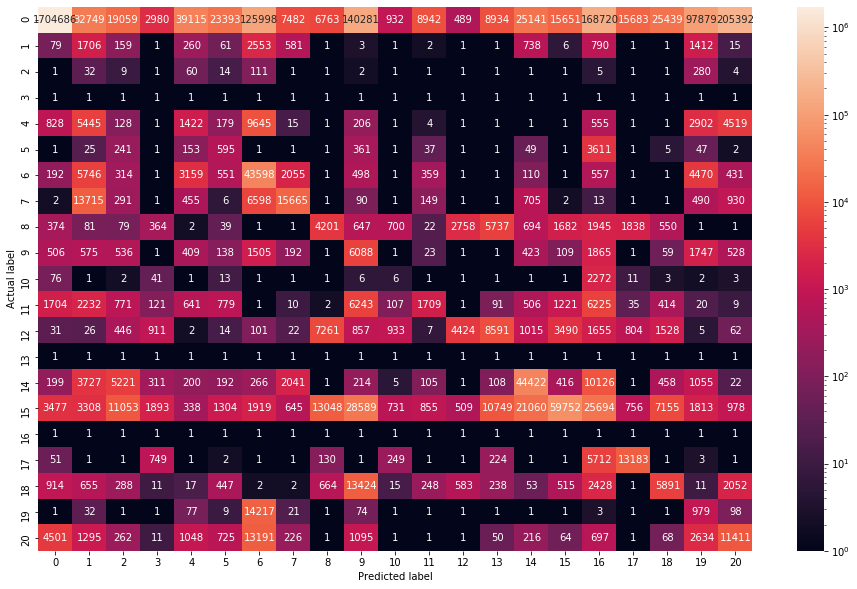

In [4]:
y_true, y_pred = model.predict_dataset(m5, test_gen, 50, batch_size)
data.confusion_matrix(y_true, y_pred)
plt.savefig('weights_cmD.png', bbox_inches='tight')

In [5]:
y_hat = m5.predict(x)

In [15]:
true_positives = np.sum(np.round(np.clip(y * y_hat, 0, 1)))
predicted_positives = np.sum(np.round(np.clip(y_hat, 0, 1)))
precision = true_positives / (predicted_positives + 1e-7)
print('Precision:', precision)

Precision: 0.8410481419920751


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


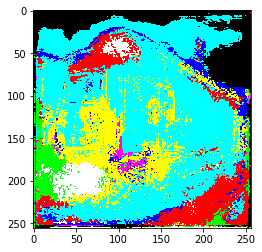

In [7]:
mask = data.mask_class_to_rgb(np.argmax(y_hat[4], axis=2))
plt.imshow(mask)
#plt.savefig('weights_trainD.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


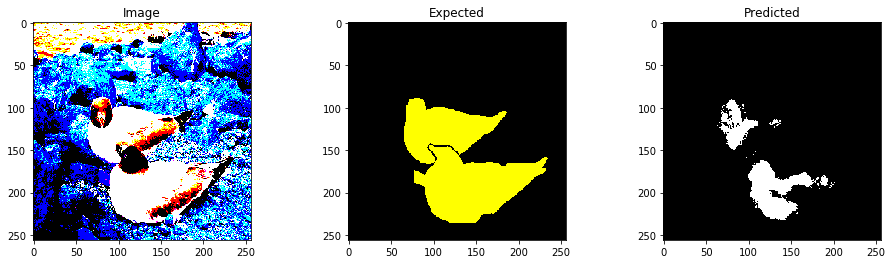

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


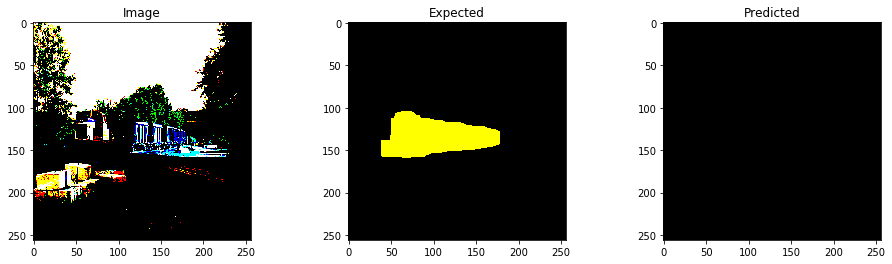

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


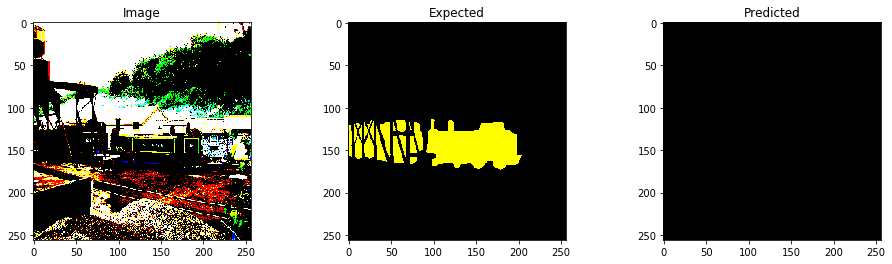

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


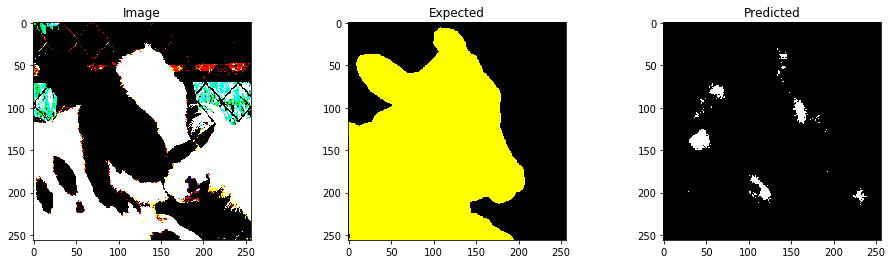

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person:       100.00%


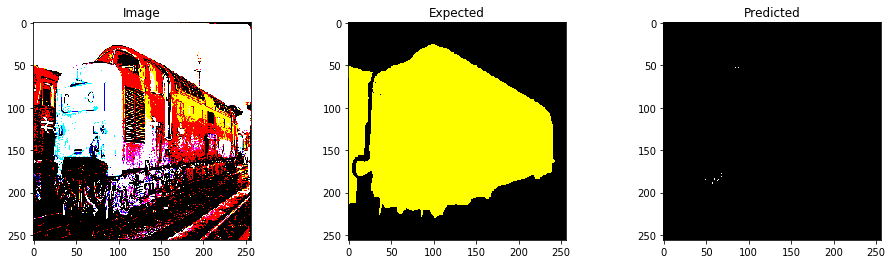

In [6]:
for i in range(5):
    plt.figure(figsize=(16, 4))
    data.display_result(x, y, y_hat, i)
    plt.show()